In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [13]:
from xgboost import XGBClassifier

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
df=pd.read_csv("salary.csv")


In [16]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

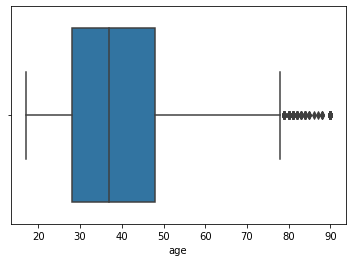

In [20]:
sns.boxplot(df['age'])

In [21]:
q1=df['age'].quantile(0.25)

In [22]:
q3=df['age'].quantile(0.75)

In [23]:
IQR=q3-q1

In [24]:
lower=q1-1.5*IQR

In [25]:
higher=q3+1.5*IQR

In [26]:
df=df[(df['age']>lower) & (df['age']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

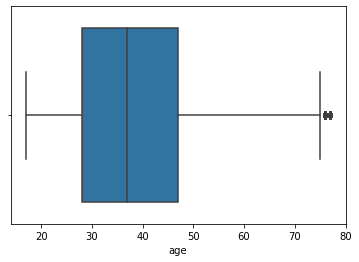

In [27]:
sns.boxplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

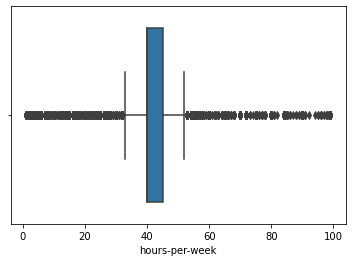

In [28]:
sns.boxplot(df['hours-per-week'])

In [29]:
q1=df['hours-per-week'].quantile(0.25)

In [30]:
q3=df['hours-per-week'].quantile(0.75)

In [31]:
IQR=q3-q1

In [32]:
lower=q1-1.5*IQR

In [33]:
higher=q3+1.5*IQR

In [34]:
df=df[(df['hours-per-week']>lower) & (df['hours-per-week']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week'>

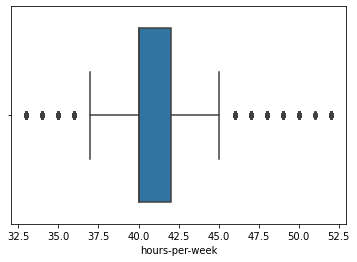

In [35]:
sns.boxplot(df['hours-per-week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

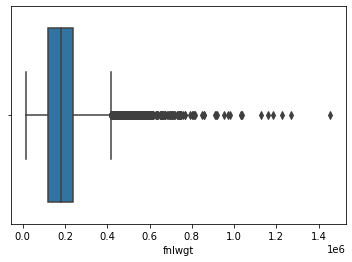

In [36]:
sns.boxplot(df['fnlwgt'])

In [37]:
q1=df['fnlwgt'].quantile(0.25)

In [38]:
q3=df['fnlwgt'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
higher=q3+1.5*IQR

In [42]:
df=df[(df['fnlwgt']>lower) & (df['fnlwgt']<higher)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

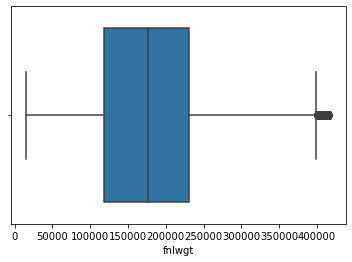

In [43]:
sns.boxplot(df['fnlwgt'])

In [44]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='workclass', ylabel='count'>

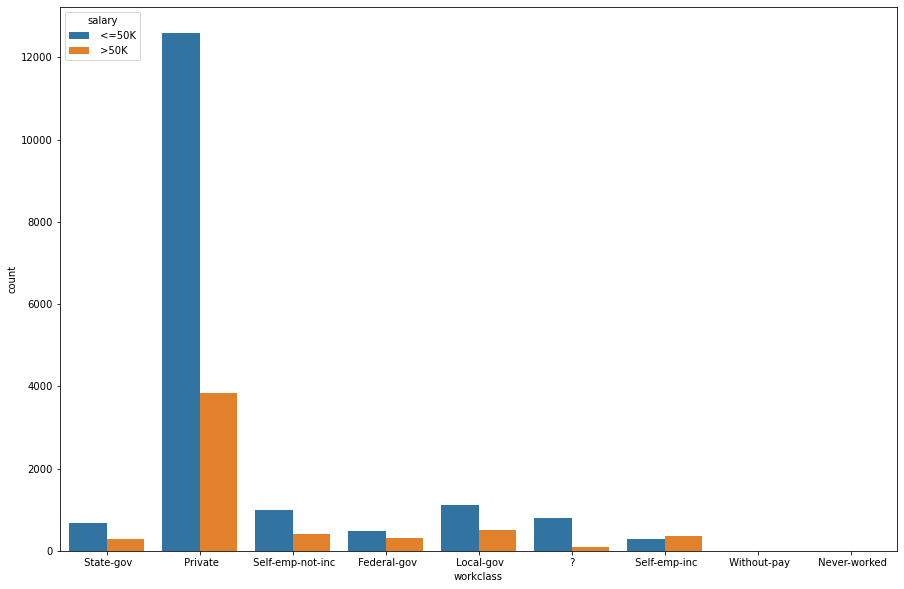

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['workclass'],hue=df['salary'])

<AxesSubplot:xlabel='education', ylabel='count'>

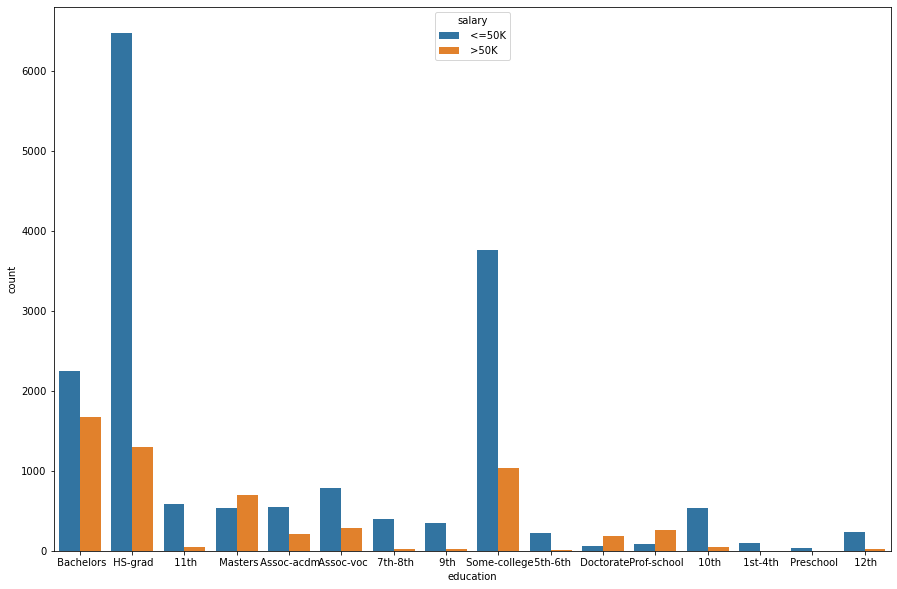

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['education'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital-status', ylabel='count'>

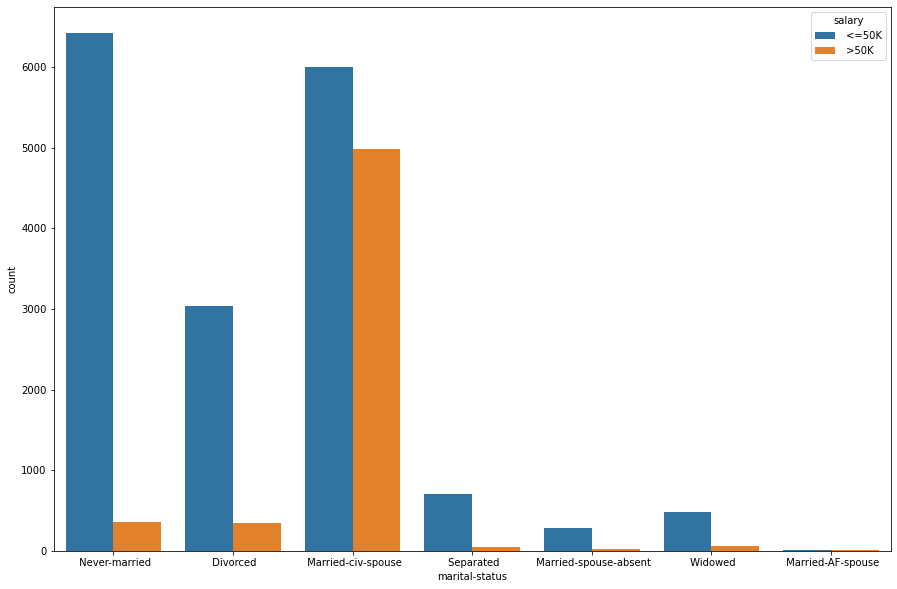

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(df['marital-status'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='occupation', ylabel='count'>

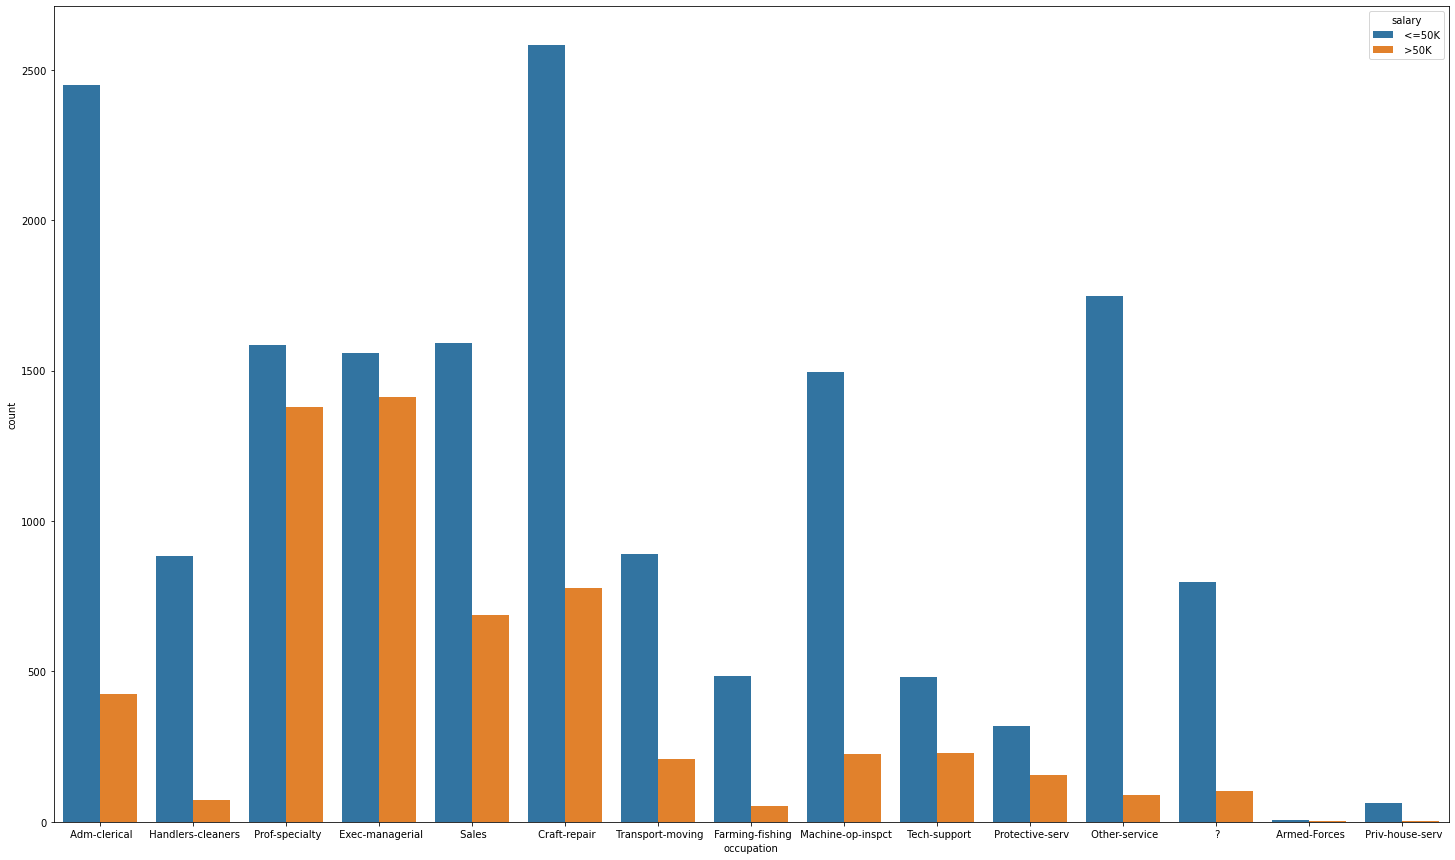

In [48]:
plt.figure(figsize=(25,15))
sns.countplot(df['occupation'],hue=df['salary'])

<AxesSubplot:xlabel='relationship', ylabel='count'>

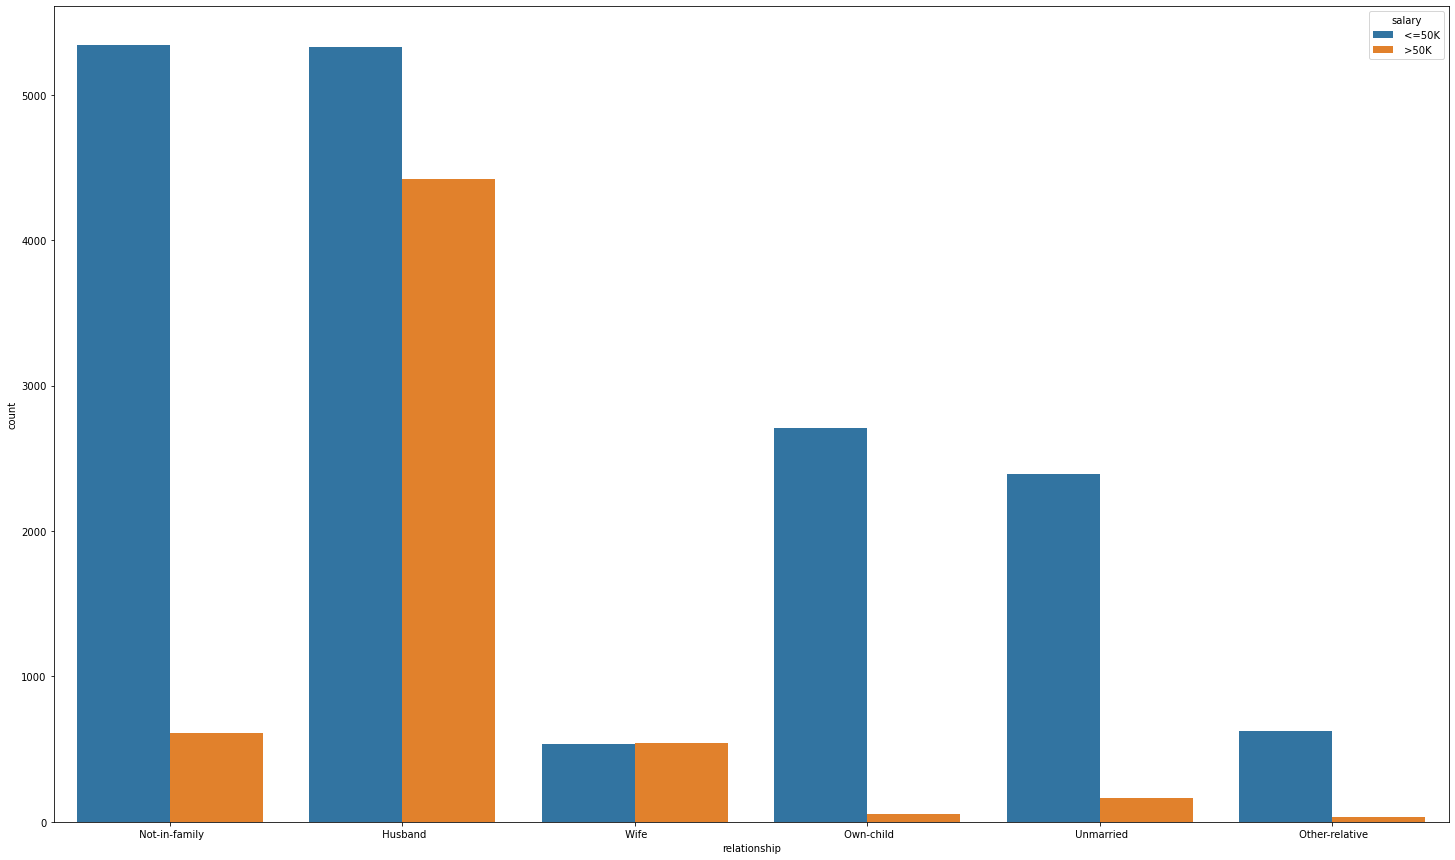

In [49]:
plt.figure(figsize=(25,15))
sns.countplot(x=df['relationship'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

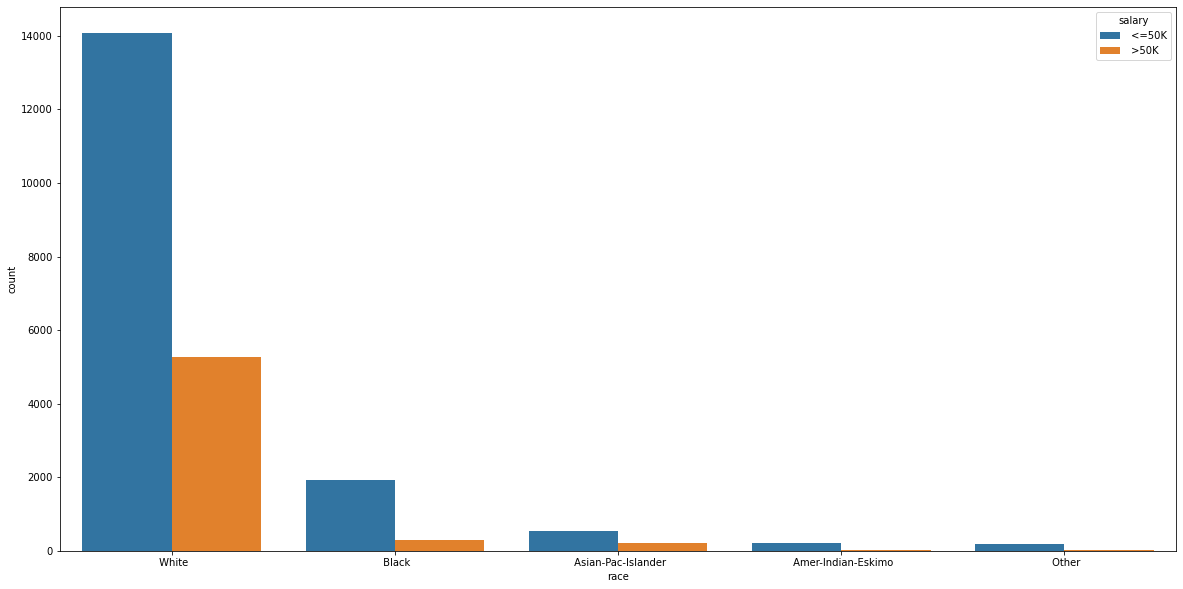

In [50]:
plt.figure(figsize=(20,10))
sns.countplot(df['race'],hue=df['salary'])

<AxesSubplot:xlabel='age', ylabel='count'>

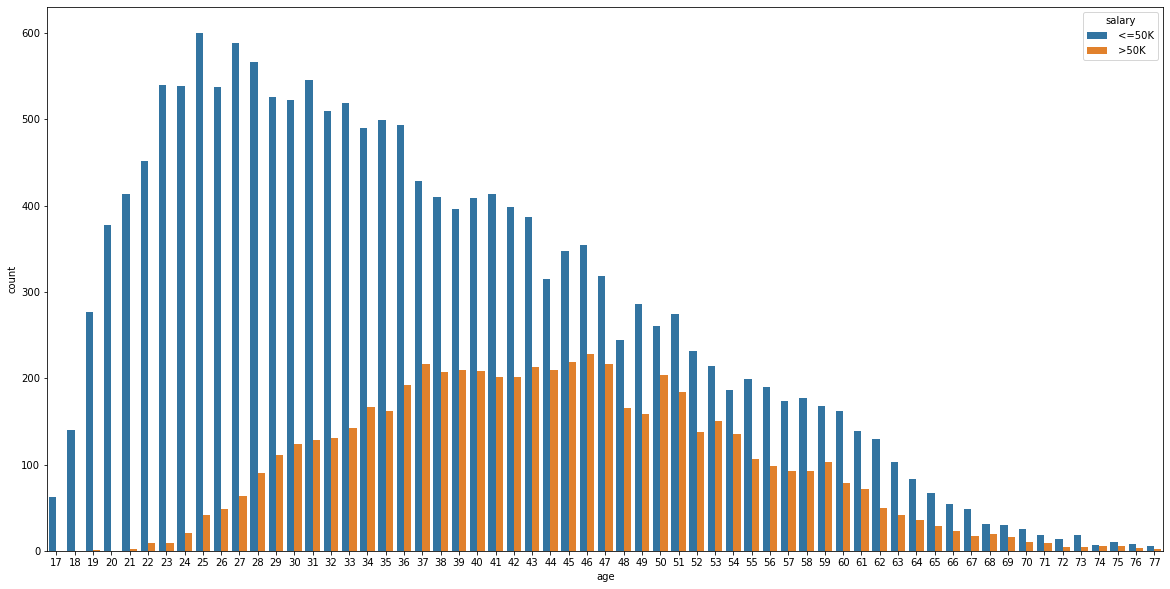

In [51]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['age'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='native-country', ylabel='count'>

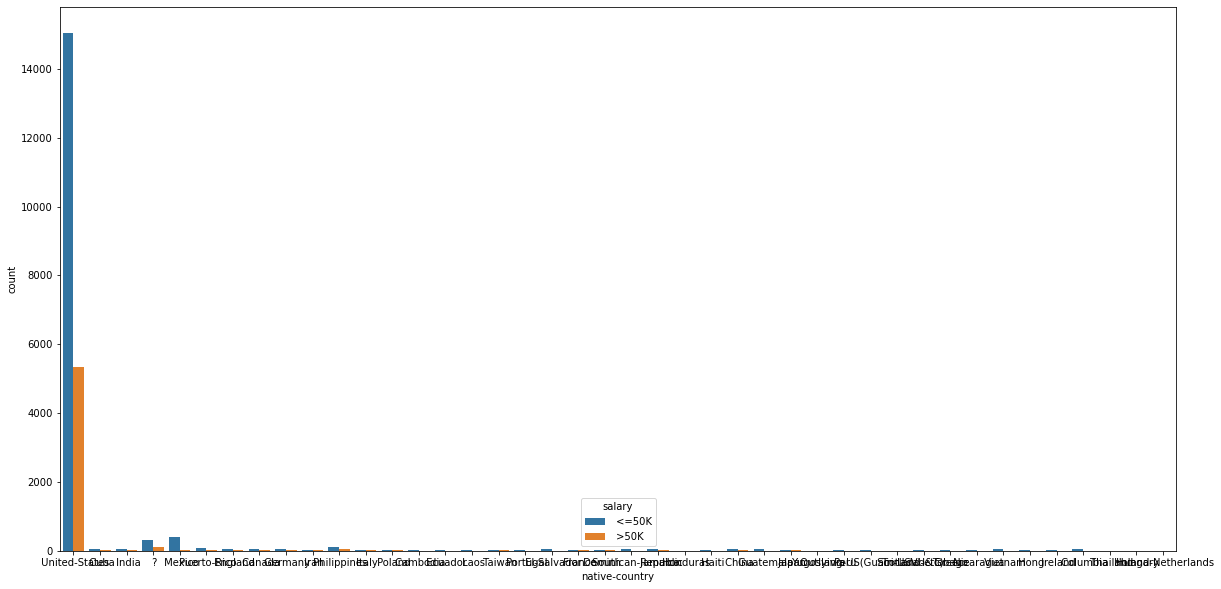

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(df['native-country'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

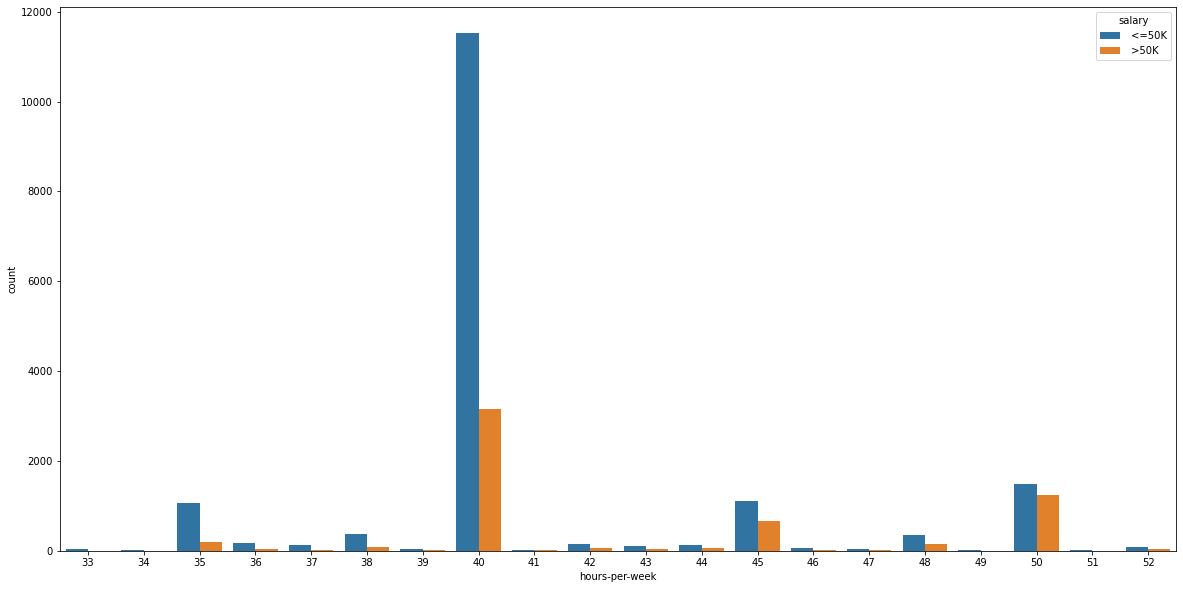

In [53]:
plt.figure(figsize=(20,10))
sns.countplot(df['hours-per-week'],hue=df['salary'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education-num', ylabel='count'>

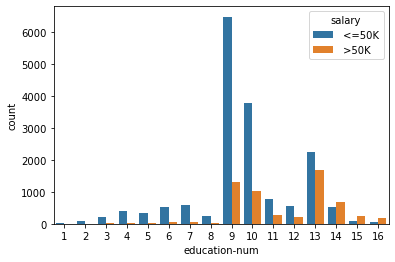

In [54]:
sns.countplot(df['education-num'],hue=df['salary'])

In [55]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='sex', ylabel='age'>

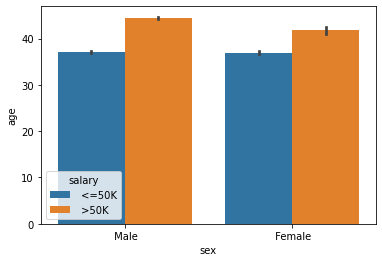

In [56]:
sns.barplot(x='sex',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='race', ylabel='age'>

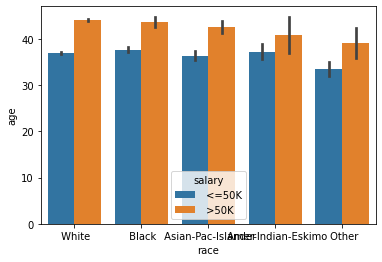

In [57]:
sns.barplot(x='race',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='education', ylabel='age'>

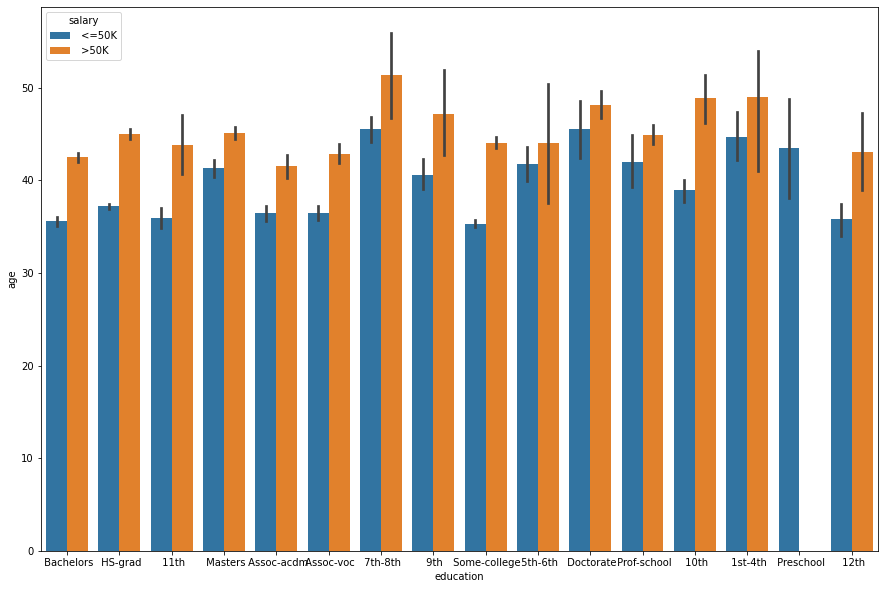

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(x='education',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='occupation', ylabel='age'>

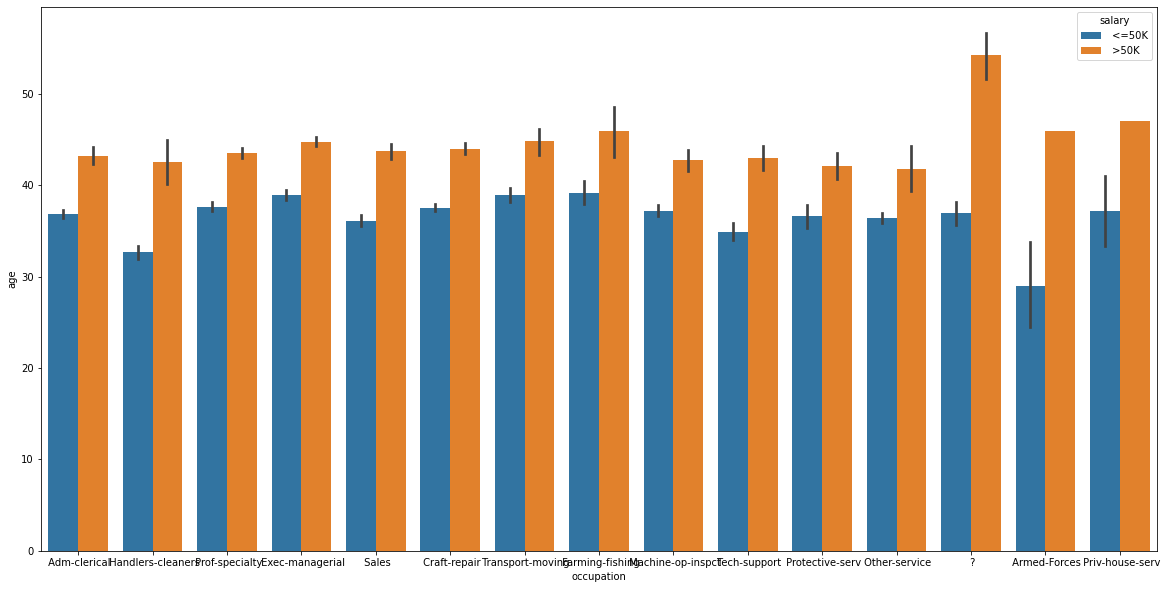

In [59]:
plt.figure(figsize=(20,10))
sns.barplot(x='occupation',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='relationship', ylabel='age'>

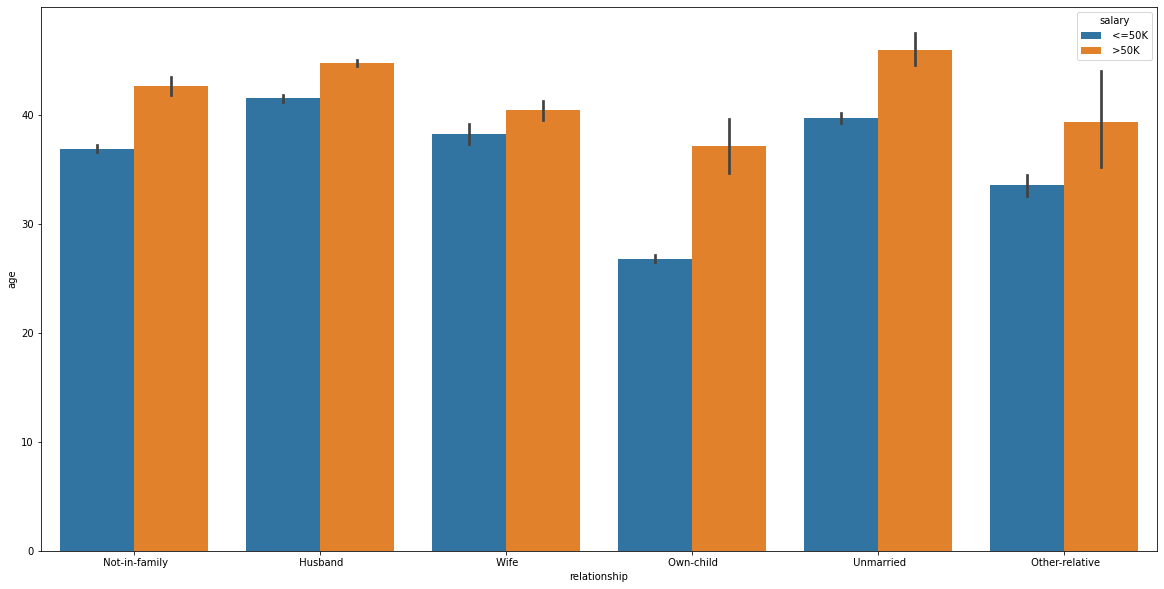

In [60]:
plt.figure(figsize=(20,10))
sns.barplot(x='relationship',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='sex', ylabel='age'>

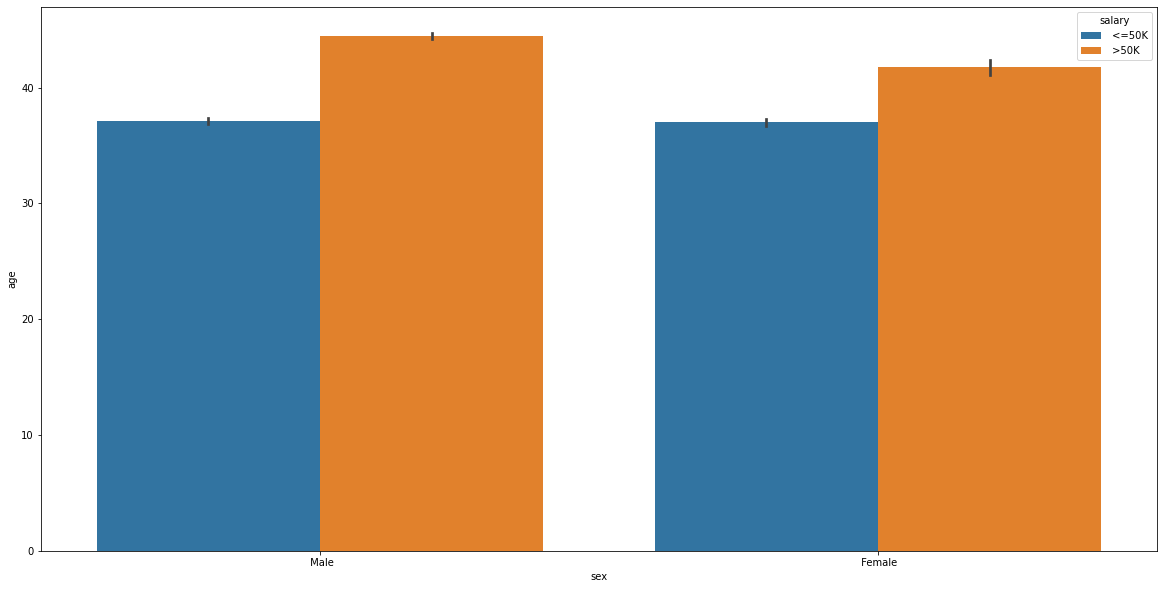

In [61]:
plt.figure(figsize=(20,10))
sns.barplot(x='sex',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='native-country', ylabel='age'>

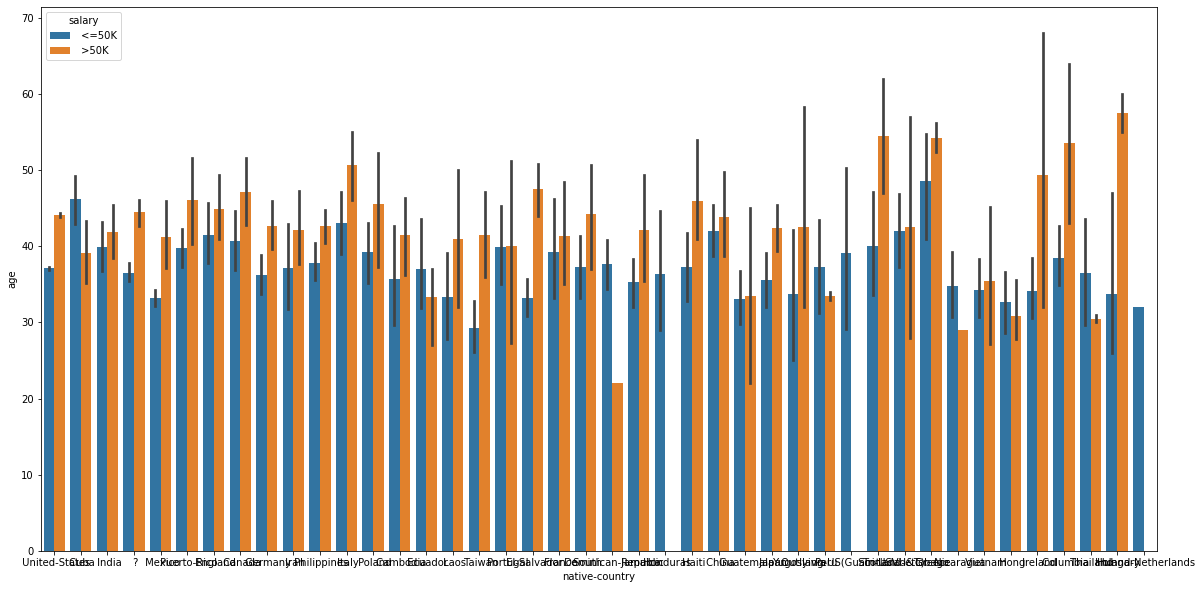

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x='native-country',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='workclass', ylabel='age'>

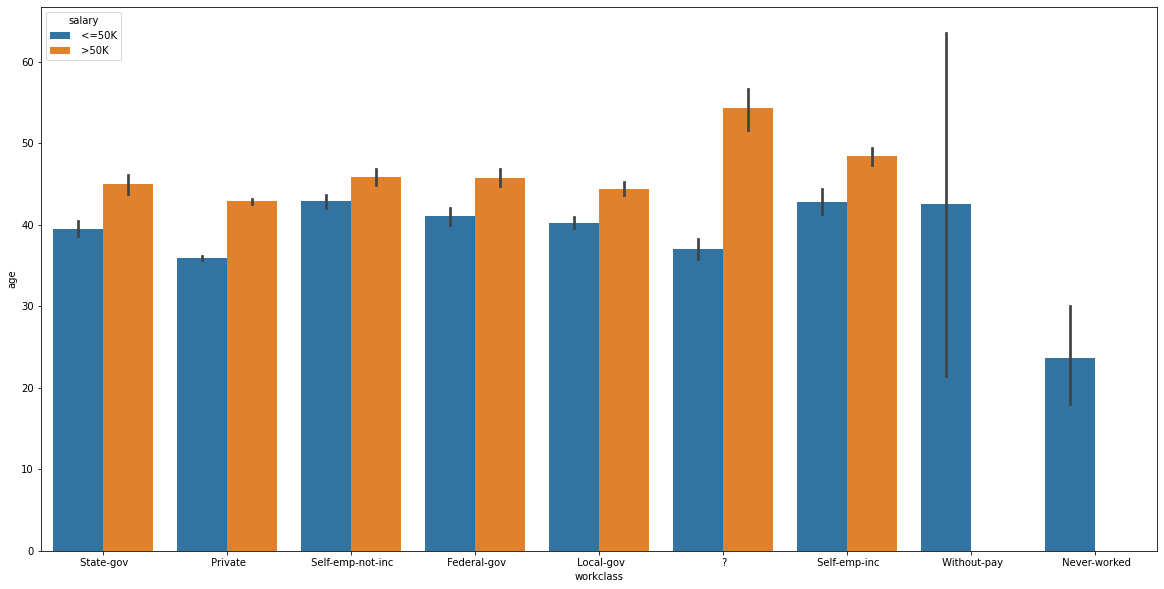

In [63]:
plt.figure(figsize=(20,10))
sns.barplot(x='workclass',y='age',data=df,hue='salary')

<AxesSubplot:xlabel='hours-per-week', ylabel='age'>

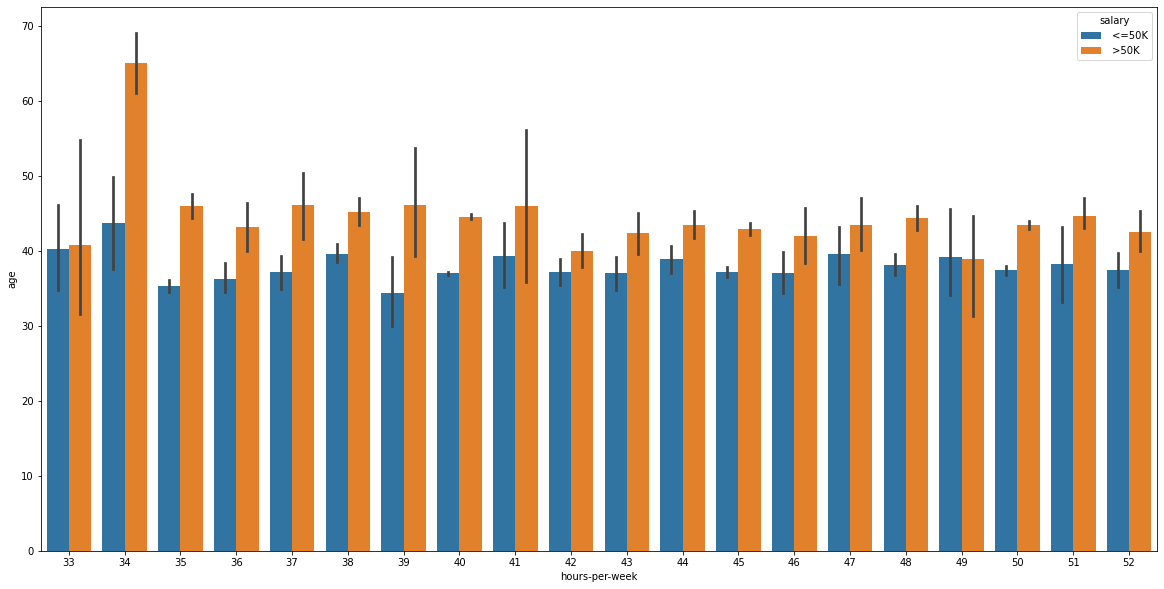

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x='hours-per-week',y='age',data=df,hue='salary')

In [65]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot:xlabel='workclass', ylabel='age'>

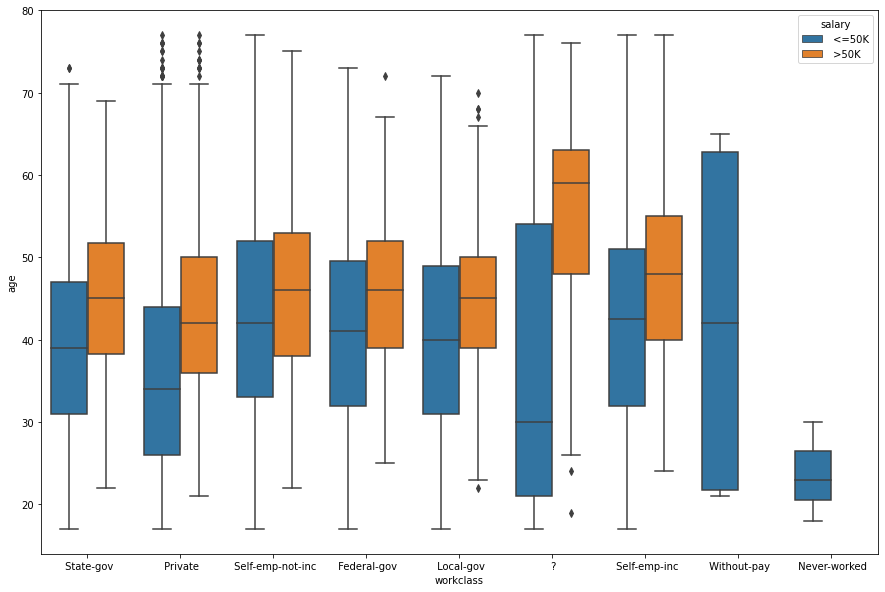

In [66]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['workclass'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='education', ylabel='age'>

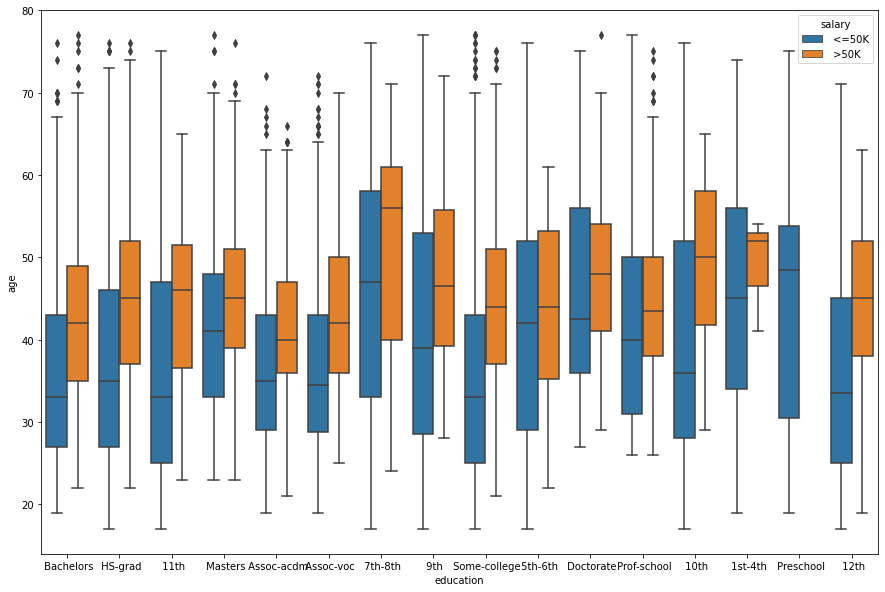

In [67]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['education'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='marital-status', ylabel='age'>

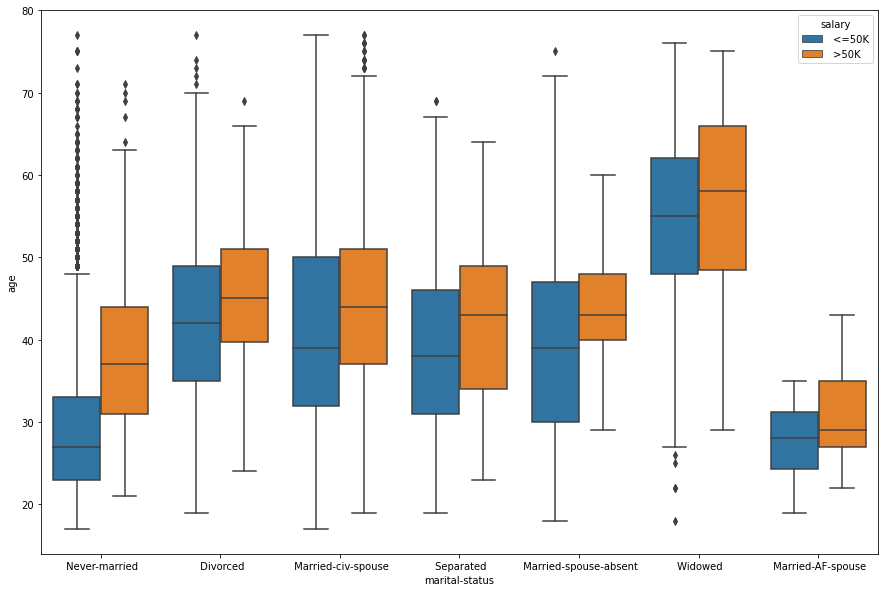

In [68]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['marital-status'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='occupation', ylabel='age'>

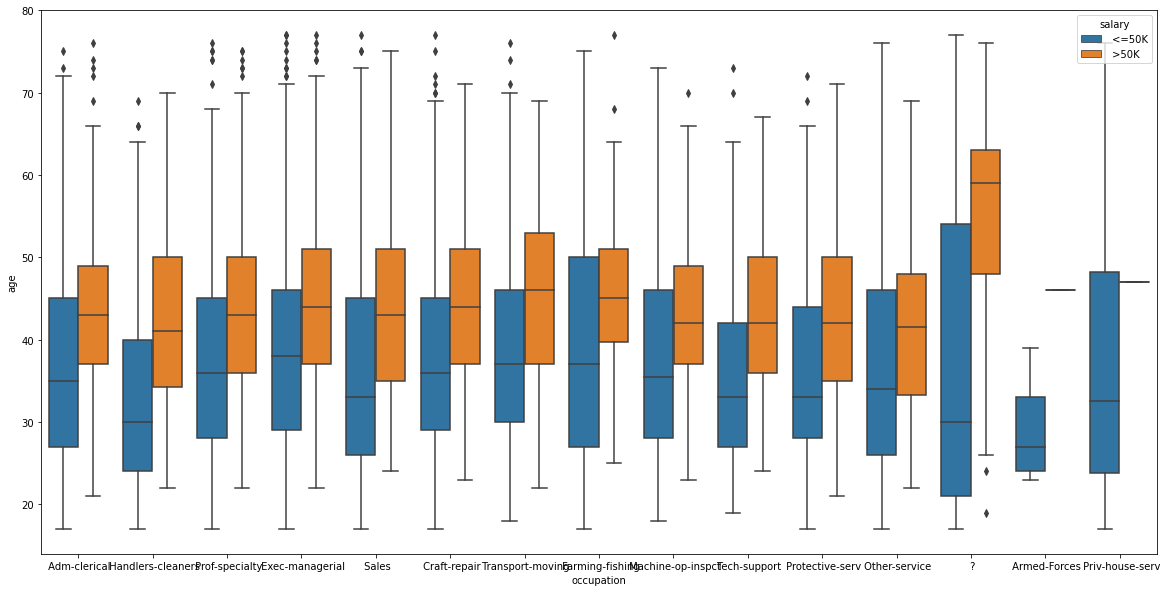

In [69]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['occupation'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='relationship', ylabel='age'>

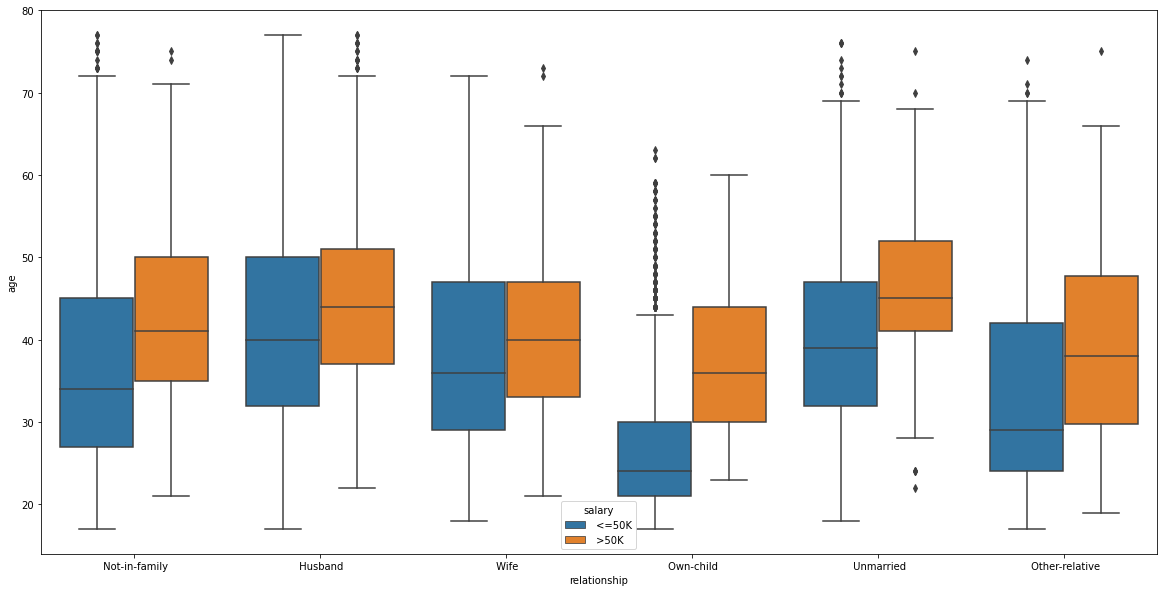

In [70]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['relationship'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='race', ylabel='age'>

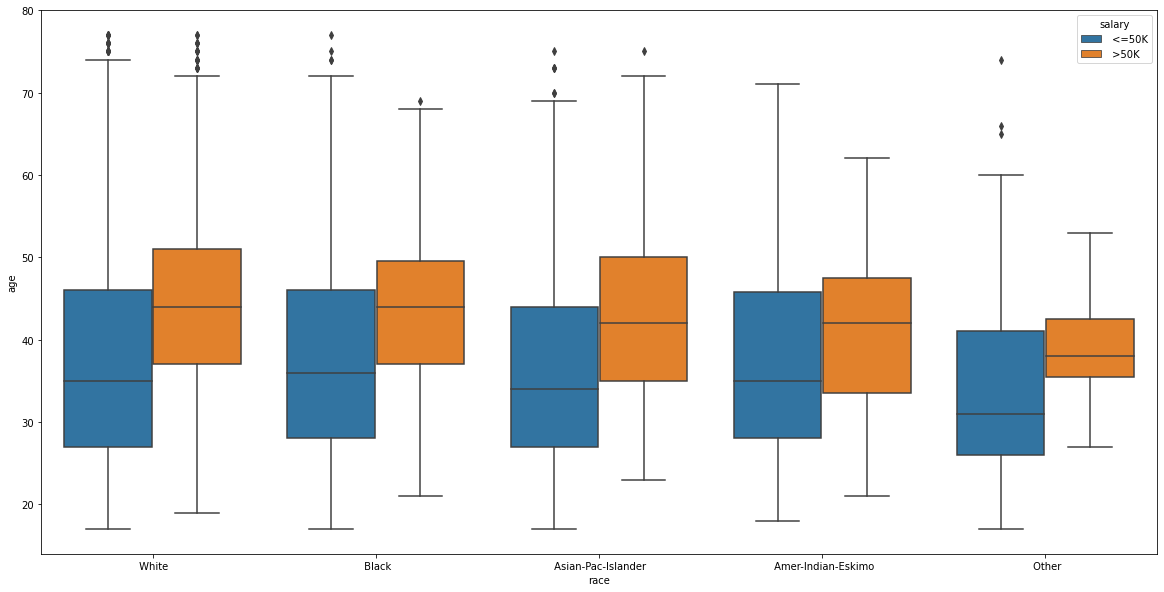

In [71]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['race'],y=df['age'],hue=df['salary'])

<AxesSubplot:xlabel='native-country', ylabel='age'>

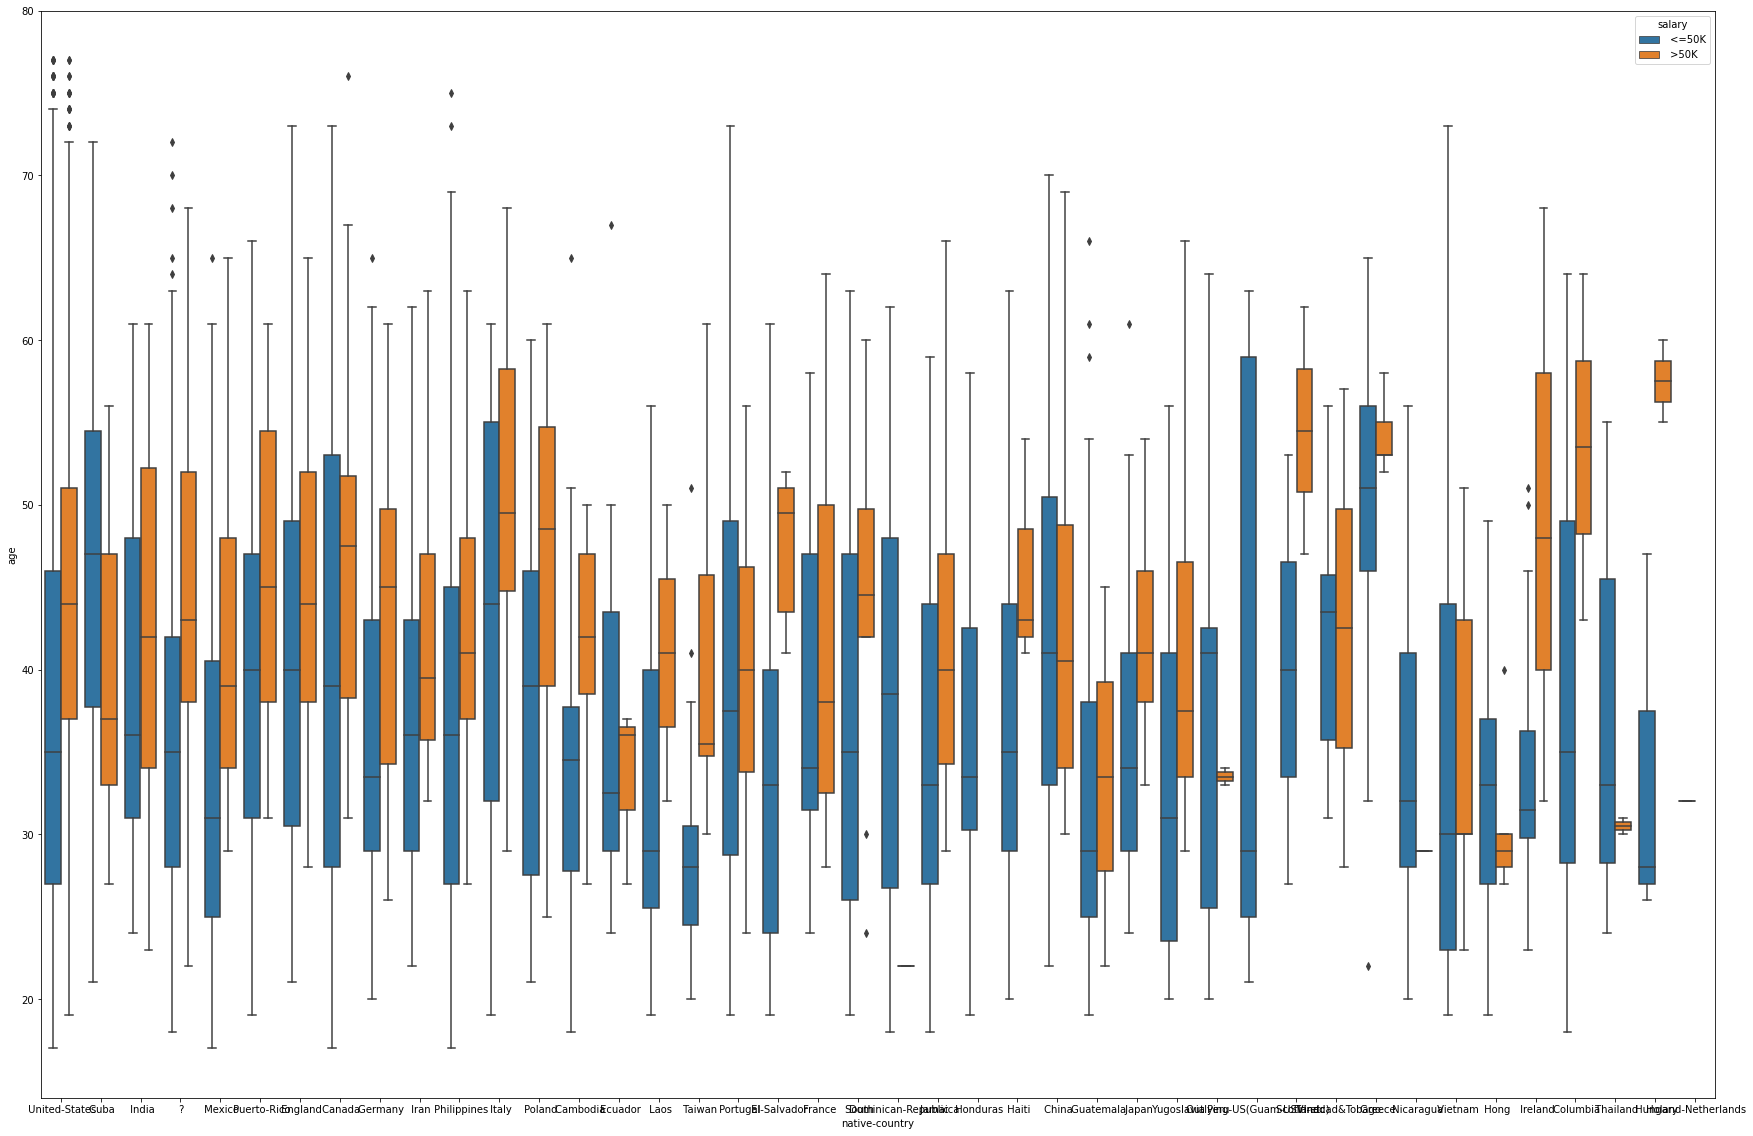

In [72]:
plt.figure(figsize=(30,20))
sns.boxplot(x=df['native-country'],y=df['age'],hue=df['salary'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

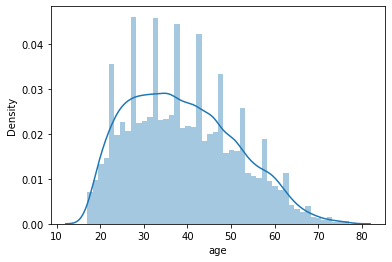

In [73]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

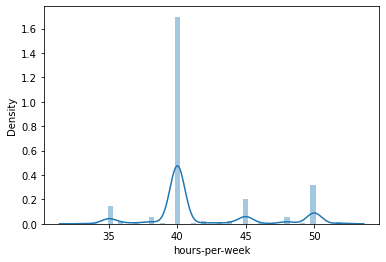

In [74]:
sns.distplot(df['hours-per-week'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

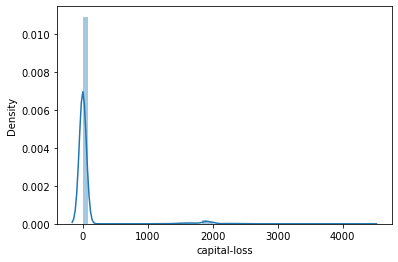

In [75]:
sns.distplot(df['capital-loss'])

In [76]:
df['capital-loss']=np.log(df['capital-loss'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [77]:
df=df[df['capital-loss']>0]



C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

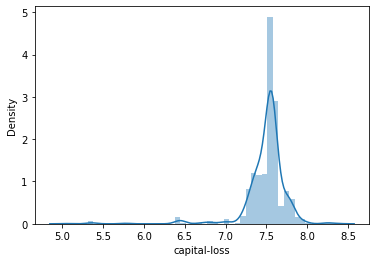

In [78]:
sns.distplot(df['capital-loss'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

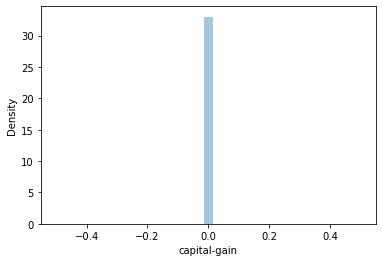

In [79]:
sns.distplot(df['capital-gain'])


In [80]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,7.621685,40,United-States,<=50K
32,45,Private,386940,Bachelors,13,Divorced,Exec-managerial,Own-child,White,Male,0,7.249926,40,United-States,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,7.360740,35,?,<=50K
112,56,Self-emp-not-inc,335605,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,7.542744,50,Canada,>50K
131,24,Private,43323,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,7.474205,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,53,Local-gov,186303,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,7.542744,40,United-States,>50K
32416,33,Private,191335,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,7.550661,50,United-States,>50K
32441,53,Private,304504,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,7.542744,45,United-States,>50K
32445,61,Private,190682,HS-grad,9,Widowed,Craft-repair,Not-in-family,Black,Female,0,7.419980,50,United-States,<=50K


In [81]:
le=LabelEncoder()


In [82]:
df['workclass']=le.fit_transform(df['workclass'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\1857712185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass']=le.fit_transform(df['workclass'])


In [83]:
df['education']=le.fit_transform(df['education'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\1505087453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=le.fit_transform(df['education'])


In [84]:
df['marital-status']=le.fit_transform(df['marital-status'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\2062021258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital-status']=le.fit_transform(df['marital-status'])


In [85]:
df['occupation']=le.fit_transform(df['occupation'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\1622587964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation']=le.fit_transform(df['occupation'])


In [86]:

df['relationship']=le.fit_transform(df['relationship'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\3820658583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['relationship']=le.fit_transform(df['relationship'])


In [87]:
df['race']=le.fit_transform(df['race'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\2002995246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['race']=le.fit_transform(df['race'])


In [88]:
df['sex']=le.fit_transform(df['sex'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\1340687048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])


In [89]:
df['native-country']=le.fit_transform(df['native-country'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\346732915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country']=le.fit_transform(df['native-country'])


In [90]:
df['salary']=le.fit_transform(df['salary'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_524\1876097155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary']=le.fit_transform(df['salary'])


In [91]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
23,43,3,117037,1,7,1,13,0,4,1,0,7.621685,40,27,0
32,45,3,386940,9,13,0,4,3,4,1,0,7.249926,40,27,0
93,30,3,117747,11,9,1,11,5,1,0,0,7.360740,35,0,0
112,56,5,335605,11,9,1,8,0,4,1,0,7.542744,50,2,1
131,24,3,43323,11,9,3,8,1,4,0,0,7.474205,40,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32400,53,2,186303,15,10,1,10,0,4,1,0,7.542744,40,27,1
32416,33,3,191335,7,12,1,3,0,4,1,0,7.550661,50,27,1
32441,53,3,304504,15,10,1,13,0,4,1,0,7.542744,45,27,1
32445,61,3,190682,11,9,5,3,1,2,0,0,7.419980,50,27,0


In [92]:
y=df['salary']

In [93]:
X=df.drop('salary',axis=1)

In [94]:
sc=StandardScaler()


In [95]:
X=sc.fit_transform(X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [97]:
X_train.shape

(874, 14)

In [98]:
y_train.shape

(874,)

In [99]:
lr=LogisticRegression()

In [100]:
lr.fit(X_train,y_train)

LogisticRegression()

In [101]:
y_pred=lr.predict(X_test)


In [102]:
accuracy_score(y_test,y_pred)

0.7351598173515982

In [103]:
mean_squared_error(y_test,y_pred)

0.2648401826484018

In [104]:
confusion_matrix(y_test,y_pred)

array([[69, 28],
       [30, 92]], dtype=int64)

In [105]:
rfc=RandomForestClassifier()


In [106]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [107]:
y_pred=rfc.predict(X_test)


In [108]:
accuracy_score(y_test,y_pred)

0.8858447488584474

In [109]:
mean_squared_error(y_test,y_pred)

0.1141552511415525

In [110]:
confusion_matrix(y_test,y_pred)

array([[ 89,   8],
       [ 17, 105]], dtype=int64)

In [111]:
dtc=DecisionTreeClassifier()


In [112]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [113]:
y_pred=dtc.predict(X_test)


In [114]:
accuracy_score(y_test,y_pred)

0.908675799086758

In [115]:
mean_squared_error(y_test,y_pred)

0.091324200913242

In [116]:
confusion_matrix(y_test,y_pred)

array([[ 89,   8],
       [ 12, 110]], dtype=int64)

In [117]:
knc=KNeighborsClassifier()


In [118]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [119]:
y_pred=knc.predict(X_test)


In [120]:
accuracy_score(y_test,y_pred)

0.6894977168949772

In [121]:
mean_squared_error(y_test,y_pred)

0.3105022831050228

In [122]:
confusion_matrix(y_test,y_pred)

array([[63, 34],
       [34, 88]], dtype=int64)

In [123]:
xgb=XGBClassifier()


In [124]:
xgb.fit(X_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [125]:
y_pred=xgb.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

1.0

In [127]:
mean_squared_error(y_test,y_pred)

0.0

In [128]:
confusion_matrix(y_test,y_pred)

array([[ 97,   0],
       [  0, 122]], dtype=int64)